# ML Course 3 - Practice

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE (L)** e.g. 2.0
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin

In [2]:
data = pd.read_csv("FuelConsumption.csv")
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
197,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,AS6,X,9.1,6.3,7.8,36,179
264,2014,CHEVROLET,SUBURBAN 4WD,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
1045,2014,VOLKSWAGEN,PASSAT,MID-SIZE,2.5,5,A6,X,11.0,8.0,9.7,29,223
983,2014,TOYOTA,HIGHLANDER,SUV - SMALL,3.5,6,AS6,X,12.6,9.4,11.2,25,258
728,2014,MERCEDES-BENZ,C 350 4MATIC COUPE,SUBCOMPACT,3.5,6,AS7,Z,12.1,8.7,10.6,27,244
695,2014,MAZDA,CX-5,SUV - SMALL,2.0,4,M6,X,9.0,6.8,8.0,35,184


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
197,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,AS6,X,9.1,6.3,7.8,36,179
264,2014,CHEVROLET,SUBURBAN 4WD,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
1045,2014,VOLKSWAGEN,PASSAT,MID-SIZE,2.5,5,A6,X,11.0,8.0,9.7,29,223
983,2014,TOYOTA,HIGHLANDER,SUV - SMALL,3.5,6,AS6,X,12.6,9.4,11.2,25,258
728,2014,MERCEDES-BENZ,C 350 4MATIC COUPE,SUBCOMPACT,3.5,6,AS7,Z,12.1,8.7,10.6,27,244
695,2014,MAZDA,CX-5,SUV - SMALL,2.0,4,M6,X,9.0,6.8,8.0,35,184


# Part 0 - Preparing the dataset 

### Define X and y
- You want to predict **CO2EMISSIONS**
- Your feature matrix will only contain **ENGINESIZE**
- Define both variables as 2-dimensional numpy arrays

In [3]:
# Extract the required columns
X = data[['ENGINESIZE']].values
y = data[['CO2EMISSIONS']].values

# Print the shapes of the arrays
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1067, 1)
y shape: (1067, 1)
X shape: (1067, 1)
y shape: (1067, 1)


In [4]:
# Test your code

assert isinstance(X, np.ndarray), "❌ X should be a NumPy array"
assert isinstance(y, np.ndarray), "❌ y should be a NumPy array"
assert X.shape == (data.shape[0], 1), "❌ Incorrect X shape"
assert y.shape == (data.shape[0], 1), "❌ Incorrect y shape"
print("OK 👌")

OK 👌
OK 👌


### Split your training and test set 

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the arrays
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (853, 1)
y_train shape: (853, 1)
X_test shape: (214, 1)
y_test shape: (214, 1)
X_train shape: (853, 1)
y_train shape: (853, 1)
X_test shape: (214, 1)
y_test shape: (214, 1)


## Part 1 - Recoding linear regression 

We will code a class as if it were a Sklearn object. 
We will build it together, step by step.  
Let's first introduce you to a new type of sklearn object: the Estimator (see [documentation](https://scikit-learn.org/stable/developers/develop.html#estimators)).  
It has two main methods:
- **fit(X, y)** -> None: that allows the model to learn from the training data
- **predict(X)** -> np.ndarray: that predicts the target variable based on the input features  

The predict() method must be called AFTER fit() has been called.

### Warm-up: Dummy Regression
You will make a dummy regressor that always predicts the **mean CO2** from the training set.  
This is the most simple model we can have, as it contains only **one parameter**.  
For you own understanding, start by calculating the mean of the CO2 variable contained in y_train.

In [6]:
# Calculate the mean of y_train
mean_co2 = np.mean(y_train)

# Print the mean of y_train
print('Mean CO2:', mean_co2)

Mean CO2: 257.2567409144197
Mean CO2: 257.2567409144197


The **DummyRegression** class is partially written for you, following sklearn's API. You need to complete two methods:
- Implement the **fit( )** so that it calculates the average CO2 emission contained in the y_train vector (and ignores X_train for now)
- Implement the **.predict( )** method so that it stupidly predicts the same value for all examples given in X. The returned vector should have the same dimensions as y_train, but all predicted values should be equal to the mean that was found with the fit() method.

In [7]:
class DummyRegression(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y):
        # Calculate the mean of y
        self.mean_ = np.mean(y)
        return self
        
    def predict(self, X):
        # Create an array of the mean of y with the same length as X
        return np.full((X.shape[0], 1), self.mean_)


Use your Dummy Regressor to make predictions on the training set

In [8]:
# Instantiate your estimator
dummy_regression = DummyRegression()

# Fit your estimator to the training data
dummy_regression.fit(X_train, y_train)

# Generate predictions on the training data
predictions = dummy_regression.predict(X_train)
predictions

array([[257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257

array([[257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257.25674091],
       [257

In [9]:
# Test your code

assert isinstance(predictions, np.ndarray), "❌ Your regressor should return a numpy array."
assert predictions.shape == y_train.shape, "❌ Your prediction output should have the same shape as y_train."
assert np.all(predictions > 0)
assert np.all(predictions == predictions[0]), "❌ The dummy regressor always has the same output"
print("👌 Seems good, but check your output value with your classmates.")

👌 Seems good, but check your output value with your classmates.
👌 Seems good, but check your output value with your classmates.


#### Now use this function to plot your predictions in a graph 

In [10]:
def plot_regression(X_train, y_train, X_test, y_test, regression_model):
    X_regression_line = X_test.squeeze()
    y_regression_line = regression_model.predict(X_test).reshape(-1, 1)

    plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train, c='lightgray', label='training set')
    plt.scatter(X_test, y_test, c='black', label='test set')
    plt.plot(X_regression_line, y_regression_line, c='blue', label='regression line', linewidth=2)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

###### Work done by Sela Grace Koshy

### Linear regression with one variable

Implement the .predict( ) method in the class below.  
Use the the linear equation that uses beta 0 and beta 1.  
 $$
\hat{y} = \beta_{0} + \beta_{1} * x
$$

In [11]:
class MyLinearRegression:
    def __init__(self):
        self.beta_0 = 0.
        self.beta_1 = 0.
    
    def set_beta_0(self, beta_0: float):
        self.beta_0 = beta_0
        
    def set_beta_1(self, beta_1: float):
        self.beta_1 = beta_1
        
    def predict(self, X):
        return self.beta_0 + self.beta_1 * X


Test your model with various values of beta and see what happens when you plot the result.  
By trial and error, find the optimal values for beta 0 and beta 1.

Optimal beta_0: 50.00
Optimal beta_1: 10.00
Optimal beta_0: 50.00
Optimal beta_1: 10.00


Text(0, 0.5, 'beta_1')

Text(0, 0.5, 'beta_1')

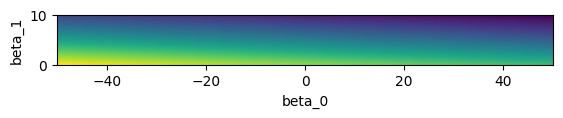

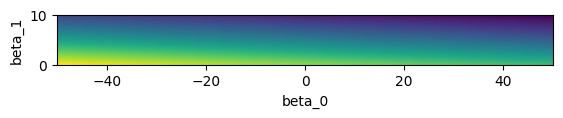

In [12]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define a range of values for beta 0 and beta 1
beta_0_range = np.linspace(-50, 50, 100)
beta_1_range = np.linspace(0, 10, 100)

# Initialize the MSE matrix
mse_matrix = np.zeros((len(beta_0_range), len(beta_1_range)))

# Calculate the MSE for each combination of beta 0 and beta 1
for i, beta_0 in enumerate(beta_0_range):
    for j, beta_1 in enumerate(beta_1_range):
        y_pred = beta_0 + beta_1 * X_train
        mse_matrix[i, j] = mse(y_train, y_pred)

# Find the optimal values for beta 0 and beta 1
i, j = np.unravel_index(np.argmin(mse_matrix), mse_matrix.shape)
beta_0_opt = beta_0_range[i]
beta_1_opt = beta_1_range[j]

# Print the optimal values
print(f"Optimal beta_0: {beta_0_opt:.2f}")
print(f"Optimal beta_1: {beta_1_opt:.2f}")

# Plot the MSE matrix
fig, ax = plt.subplots()
im = ax.imshow(mse_matrix, origin='lower', extent=[beta_0_range.min(), beta_0_range.max(), beta_1_range.min(), beta_1_range.max()])
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

### Cost function 

Write a function that calculates the cost of an array of predictions. Use the following equation for the cost function, which is very close to the Mean Square Error:
$$
\text{Cost} = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2
$$

In [16]:
def cost(predictions, targets):
    m = len(predictions)
    cost = (1 / (2 * m)) * np.sum((predictions - targets) ** 2)
    return cost

Test your cost function

In [18]:
# Test your code
assert isinstance(cost(predictions, y_train), float), "❌ The output of the cost function should be a float."
assert round(cost(np.array([1,1,1]), np.array([2,3,4])), 2) == round(14 / 2 / 3, 2), "❌ The calculation of your cost is not quite right."
print("Looks good! 👌")

Looks good! 👌
Looks good! 👌


Test the cost of your predictions with the optimal beta values that you found previously and see what happens if you move away from your optimal value.

In [19]:
predictions = beta_0_opt + beta_1_opt * X_test
cost = cost(predictions, y_test)
print("Cost with optimal beta values:", cost)

Cost with optimal beta values: 15678.778037383176
Cost with optimal beta values: 15678.778037383176


### Model training  (Bonus)

Implement the fit function using the gradient descent algorithm.  
Remember, at each iteration, you need to calculate the increment step with the partial derivatives of the cost function with respect to beta_0 and beta_1, and THEN update your parameters.  
Use alpha as the learning rate to decrease the size of your steps.

Alpha is a **hyperparameter**, which is why it is defined in the constructor of the class.

In [20]:
class MyLinearRegression(BaseEstimator, RegressorMixin):
    
    def __init__(self, lr=0.01, n_iters=1000, alpha=0.05):
        self.beta_0 = 0.
        self.beta_1 = 0.
        self.alpha = alpha
        self.lr = lr
        self.n_iters = n_iters
        
    def predict(self, X):
        # Predict the target variable using the learned parameters
        return self.beta_0 + self.beta_1 * X

    def set_beta_0(self, beta_0: float):
        self.beta_0 = beta_0
        
    def set_beta_1(self, beta_1: float):
        self.beta_1 = beta_1

    def fit(self, X, y):
        m = len(y)
        cost_history = []
        beta_0_history = [self.beta_0]
        beta_1_history = [self.beta_1]
        
        for i in range(1000):
            predictions = self.predict(X)
            error = predictions - y
            cost_add = cost(predictions, y)
            cost_history.append(cost_add)
            
            gradient_0 = (1/m) * np.sum(error)
            gradient_1 = (1/m) * np.sum(error * X)
            
            self.beta_0 -= self.alpha * gradient_0
            self.beta_1 -= self.alpha * gradient_1
            
            beta_0_history.append(self.beta_0)
            beta_1_history.append(self.beta_1)
            
        return cost_history, beta_0_history, beta_1_history
        

Test your fit method to see if it seems to converge

In [21]:
# create an instance of MyLinearRegression
my_lr = MyLinearRegression(alpha=0.01)

# fit the model on the training data
my_lr.fit(X_train, y_train)

# plot the cost over the iterations
plt.plot(my_lr.cost_history)
plt.title("Cost over iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


TypeError: 'numpy.float64' object is not callable

TypeError: 'numpy.float64' object is not callable

## Part 2 - Data exploration

For these questions, you may use your entire dataset (i.e. without train/test split), which is stored as a pandas DataFrame in the *data* variable.

### 1. Compute the correlation value between the CO2 emission and the engine size. 

📝 Do you think that the engine size can be taken as a unique predictor for the CO2 emission? Why?

### 2. Plot the CO2 emission with respect to the engine size.

📝 Do you think that a linear regression model would fit well here? Why?

## Part 3 - Regression using Scikit-learn
For each of the questions in this part, answer with a block of at least three cells (like I did for you in part 2)
- One header text cell (starting with ###) with the question number
- One (or more) code cells with the code
- One text cell with the written answer that is asked in the question.

3. Train a linear regression model (with scikit-learn) for the prediction of the CO2 emission based exclusively on the engine size (do not forget about the train-test split you did previously).
4. What are the parameters of the regression line?  
Interpret the parameters by answer the following question: *If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model?* 
5. Plot the regression line over the data.
6. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$). For this assigment, calculate the three first metrics **manually** (i.e. without using Scikit-learn's handy methods). However you can check your results with it! R^2 score is the only metric that you are not required to calculate by hand.
7. Plot the distribution of the residuals (i.e. the error terms).
8. Can you calculate those same performance metrics for an untrained regression model where the intercept ($\beta_0$) and the coefficient ($\beta_1$) would be both 0? Are you surprised by the measured performance?
9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?
10. Go back to your "dummy" model that you built in part 1, which simply predicted the mean CO2, regardless of the input engine size (or any feature at all in fact). Plot the regression line of this model once more and calculate its performance. How does the performance compare to the the other models'? Can you explain why?  

__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook! The plot function has been provided to you, but you can do the same to compute the performances and 